In [5]:
# Import the required libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout, MaxPooling2D, Conv2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

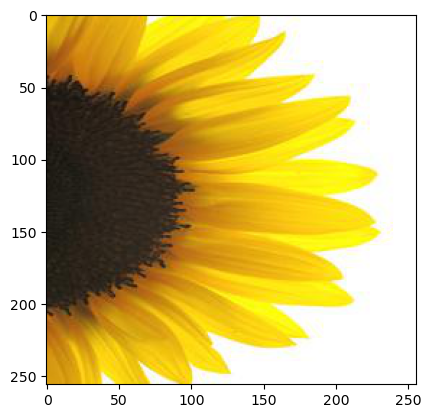

In [6]:
# Checking a data sample
img = image.load_img("Train/sunflower/3779833278_de4aebebcb_c.jpg")
imgs = plt.imshow(img)

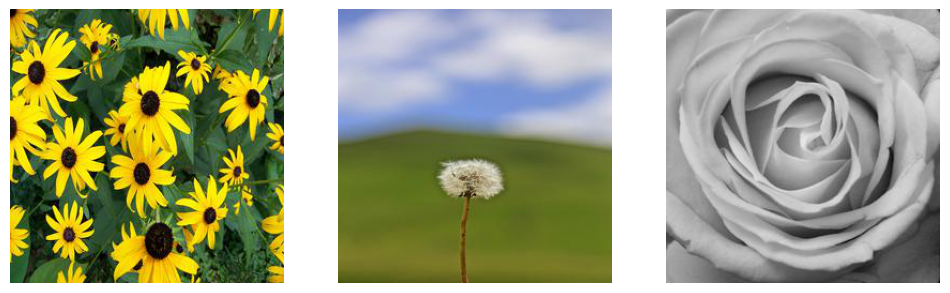

In [7]:
# Checking 3 samples of the dataset
image1 = mpimg.imread("Train/black_eyed_susan/1007595613_b884ca8509_c.jpg")
image2 = mpimg.imread("Train/dandelion/40376996111_fb90325470_c.jpg")
image3 = mpimg.imread('Train/rose/1352726882_383a582403_c.jpg')

# Create a figure with three subplots in one row
plt.figure(figsize=(12, 4))

# Plot the first image in the first subplot
plt.subplot(1, 3, 1)
plt.imshow(image1)
plt.axis('off')

# Plot the second image in the second subplot
plt.subplot(1, 3, 2)
plt.imshow(image2)
plt.axis('off')

# Plot the third image in the third subplot
plt.subplot(1, 3, 3)
plt.imshow(image3)
plt.axis('off')

# Show the plot
plt.show()

In [8]:
# Data Normalization

train_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    
)

val_gen = ImageDataGenerator(
rescale=1./255,
    validation_split=0.2

)

In [9]:
train_dir = "Train"

# Generator for training data (80% images, resized & normalized)
train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

# Generator for validation data (80% images, resized & normalized)
validation_generator = val_gen.flow_from_directory(
train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

Found 10919 images belonging to 14 classes.
Found 2723 images belonging to 14 classes.


In [10]:
# Using MobileNetV2 as the model's architecture
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

# Fine tuning model
model = Sequential([
base_model,
    Conv2D(64,(3,3),activation="relu"),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2,2)),
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dropout(0.3),
    Dense(512,activation="relu"),
    Dropout(0.2),
    Dense(256,activation="relu"),
    Dropout(0.2),
    Dense(128,activation="relu"),
    Dropout(0.4),
    Dense(14,activation="softmax")
]
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 64)          737344    
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 64)         0         
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 64)               0         
 lobalAveragePooling2D)                                          
                                                        

In [13]:
# Callbacks to prevent overfitting and improve training stability

checkpoint = ModelCheckpoint(
    "my_model.h5",
    monitor="val_accuracy",
    save_best_only=True,
    mode="max",
    verbose=1
)


early_stopping = EarlyStopping(
    monitor="val_accuracy",
    patience=6,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_accuracy",
    factor=0.2,
    patience=3,
    min_delta=0.0001,
    mode="max",
    verbose=1
)

In [14]:
# Compile: categorical cross-entropy + Adam, track accuracy
model.compile(
    loss="categorical_crossentropy",
    optimizer = "adam",
    metrics=["accuracy"]
)

In [15]:
# Fitting the model
model.fit(
    train_generator,
    epochs=100,
    steps_per_epoch = len(train_generator),
    validation_data = validation_generator,
    validation_steps = len(validation_generator),
    callbacks = [checkpoint, early_stopping,reduce_lr],
    verbose=2
)

Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.86889, saving model to my_model.h5
342/342 - 274s - loss: 1.0065 - accuracy: 0.6844 - val_loss: 0.4351 - val_accuracy: 0.8689 - lr: 0.0010 - 274s/epoch - 800ms/step
Epoch 2/100

Epoch 2: val_accuracy improved from 0.86889 to 0.88138, saving model to my_model.h5
342/342 - 139s - loss: 0.5314 - accuracy: 0.8432 - val_loss: 0.4074 - val_accuracy: 0.8814 - lr: 0.0010 - 139s/epoch - 407ms/step
Epoch 3/100

Epoch 3: val_accuracy improved from 0.88138 to 0.88212, saving model to my_model.h5
342/342 - 139s - loss: 0.4291 - accuracy: 0.8716 - val_loss: 0.3798 - val_accuracy: 0.8821 - lr: 0.0010 - 139s/epoch - 406ms/step
Epoch 4/100

Epoch 4: val_accuracy improved from 0.88212 to 0.88505, saving model to my_model.h5
342/342 - 133s - loss: 0.3594 - accuracy: 0.8966 - val_loss: 0.3984 - val_accuracy: 0.8851 - lr: 0.0010 - 133s/epoch - 390ms/step
Epoch 5/100

Epoch 5: val_accuracy improved from 0.88505 to 0.88652, saving model to my_model.h

In [16]:
# This project is belong to Maulana Zulfikar Aziz